Within the asteroids, iron was also found. It seems that the main indicators of the amount of iron are the violet stones and the size of them.

With the data collected R4 try to predict the amount of iron that an asteroid will have.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot  as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

import lr_assumptions as lr
import val_curves_helper as vc_helper

In [2]:
df = pd.read_csv('R4.csv')

In [4]:
df.describe()

,violet_stone_count,asteroid_size_km3,iron_kg
count,100.000000,100.000000,100.000000
mean,71.690000,0.654088,60.335629
std,44.399403,0.247960,31.515357
min,1.000000,0.114662,6.995585
25%,31.500000,0.497146,35.211681
50%,70.000000,0.664570,56.636521
75%,109.000000,0.784425,81.248217
max,149.000000,1.279256,139.324038


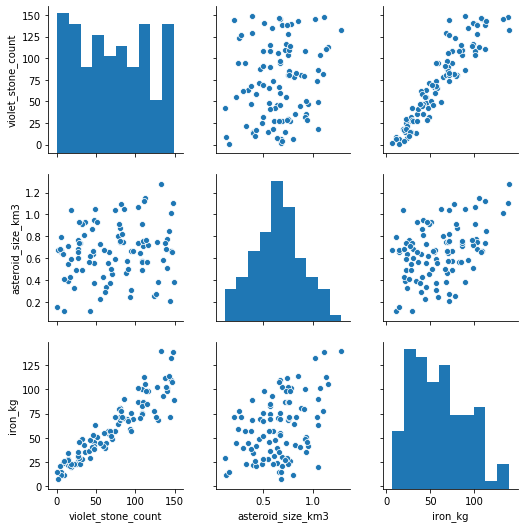

In [5]:
sns.pairplot(df)

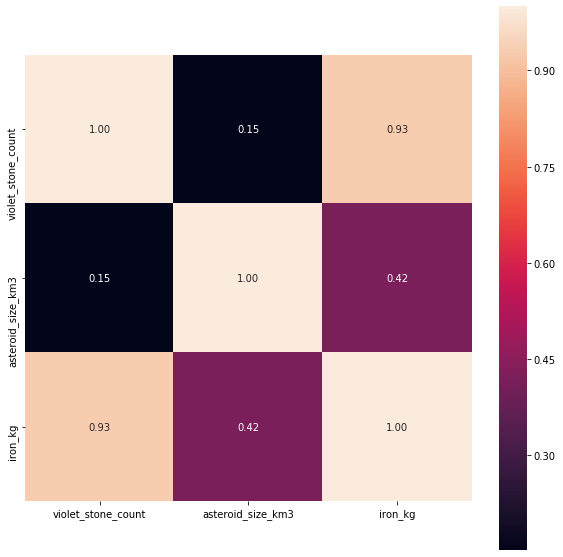

In [4]:
# correlation matrix as heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
plt.show()

## Linear Regression Assumptions 

I) Linearity

II) Normality of the Error Terms

III) No Multicollinearity among Predictors

IV) No Autocorrelation of the Error Terms

V) Homoscedasticity

In [3]:
x = df[['violet_stone_count', 'asteroid_size_km3']]
y = df.iron_kg
regr = LinearRegression().fit(x, y)

('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
('Checking with a scatter plot of actual vs. predicted.', 'Predictions should follow the diagonal line.')


/anaconda2/lib/python2.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


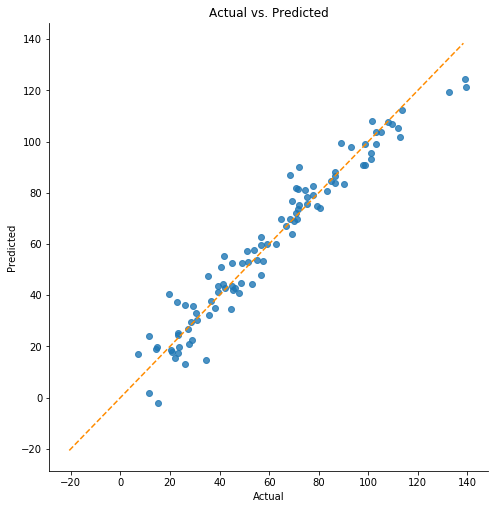

In [7]:
lr.linear_assumption(regr, x, y)

('Assumption 2: The error terms are normally distributed', '\n')
Using the Anderson-Darling test for normal distribution
('p-value from the test - below 0.05 generally means non-normal:', 0.40577027588201314)
Residuals are normally distributed


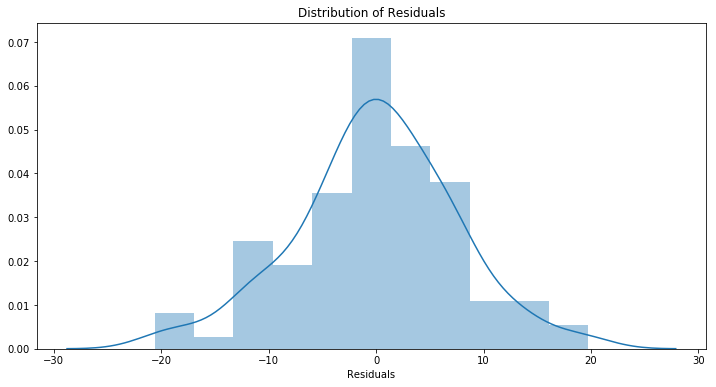

()
Assumption satisfied


In [8]:
lr.normal_errors_assumption(regr, x, y)

Assumption 3: Little to no multicollinearity among predictors


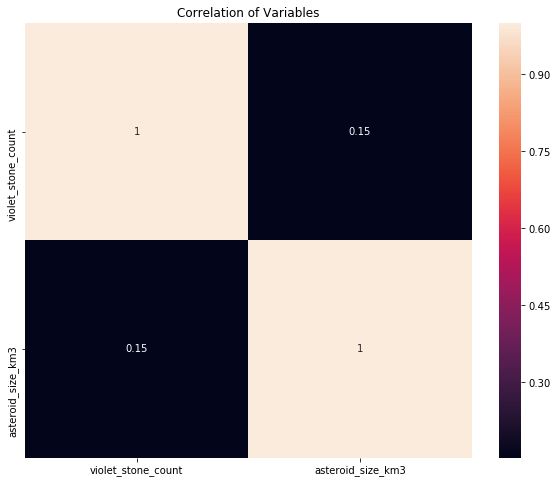

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 3.12922491009
X2: 3.12922491009
()
0 cases of possible multicollinearity
0 cases of definite multicollinearity
()
Assumption satisfied


In [9]:
linear_feature_names = ['X'+str(feature+1) for feature in range(x.shape[1])]
lr.multicollinearity_assumption(regr, x, y, linear_feature_names)

In [10]:
lr.autocorrelation_assumption(regr, x, y)

('Assumption 4: No Autocorrelation', '\n')

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
('Durbin-Watson:', 1.7614881422822843)
('Little to no autocorrelation', '\n')
Assumption satisfied


('Assumption 5: Homoscedasticity of Error Terms', '\n')
Residuals should have relative constant variance


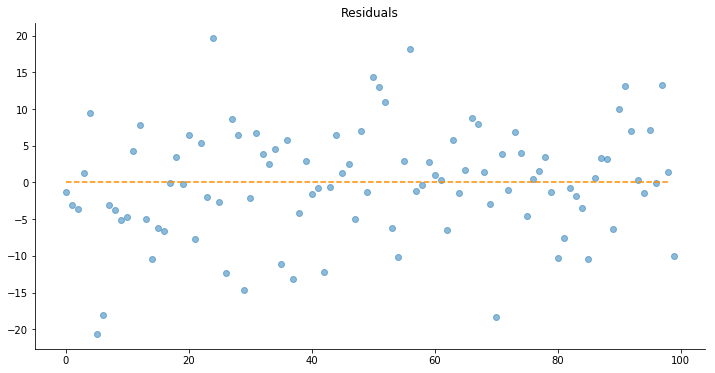

In [11]:
lr.homoscedasticity_assumption(regr, x, y)

- There don’t appear to be any obvious problems with that.

## Fit Model 

In [4]:
def print_model_statistics(regr, y_test, y_pred):

    # The coefficients
    print('Coefficients: ', regr.coef_)

    # The intercept_ 
    print('Intercept (Y axis when X = 0): ', regr.intercept_)

    # The mean squared error
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

    # The coefficient of determination: 1 is perfect prediction
    r2 = r2_score(y_test, y_pred)
    print('Coefficient of determination: %.2f' % r2)
    
    # Adjusted r2
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1-r2) * (n-1)/(n-p-1)
    print('Adjusted r2: %.2f' % adjusted_r2)
    

In [5]:
X = df[['violet_stone_count', 'asteroid_size_km3']]
y = df.iron_kg

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [6]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

print_model_statistics(regr, y_test, y_pred)

('Coefficients: ', array([ 0.60859656, 38.94730251]))
('Intercept (Y axis when X = 0): ', -9.298771586994256)
Mean squared error: 80.97
Coefficient of determination: 0.94
Adjusted r2: 0.93


Intercept (Y axis when X = 0) is negative, makes non sense this.

## MinMaxScaler 

In [16]:
X = df[['violet_stone_count', 'asteroid_size_km3']]
y = df.iron_kg

seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [18]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

print_model_statistics(regr, y_test, y_pred)

('Coefficients: ', array([93.21246234, 42.46796626]))
('Intercept (Y axis when X = 0): ', -4.266314240516628)
Mean squared error: 50.20
Coefficient of determination: 0.95
Adjusted r2: 0.95


Intercept (Y axis when X = 0) is negative, makes non sense this.

## StandardScaler 

In [53]:
X = df[['violet_stone_count', 'asteroid_size_km3']]
y = df.iron_kg

seed = 42
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

print_model_statistics(regr, y_test, y_pred)

Coefficients:  [28.14611081  8.21807242]
Intercept (Y axis when X = 0):  60.636842941803096
Mean squared error: 52.13
Coefficient of determination: 0.95
Adjusted r2: 0.94


In [108]:
#example of use
violet_stone_count = 123
asteroid_size_km3 = 0.257110
scaled_data = scaler.transform([[violet_stone_count, asteroid_size_km3]])
print(regr.predict(scaled_data))

[75.57234628]


## feature engineering

In [8]:
df_ = df.copy()
df_["violet_stone_count_x_size_km3"] = df.asteroid_size_km3 * df.violet_stone_count

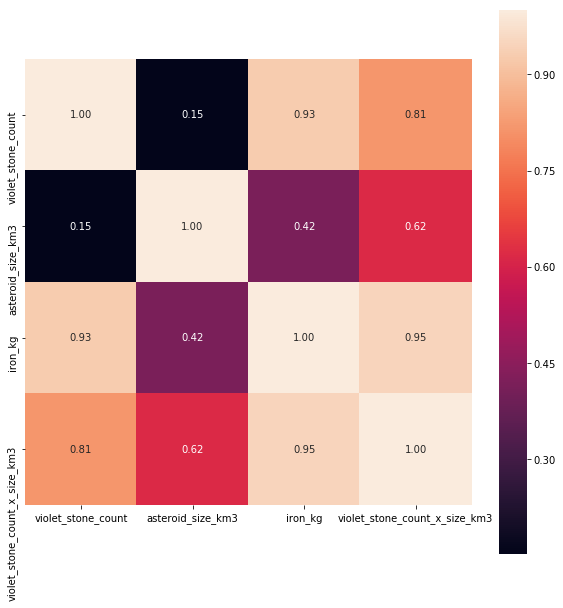

In [21]:
# correlation matrix as heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df_.corr(), square=True, annot=True, fmt='.2f')
plt.show()

- We can observe a high correlation between the new feature and violet_stone_count and asteroid_size_km3

In [22]:
X = df_[['violet_stone_count', 'asteroid_size_km3', 'violet_stone_count_x_size_km3']]
y = df_.iron_kg

seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [24]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

print_model_statistics(regr, y_test, y_pred)


('Coefficients: ', array([13.616222  , -0.92760056, 18.92844411]))
('Intercept (Y axis when X = 0): ', 61.22614839299214)
Mean squared error: 36.35
Coefficient of determination: 0.97
Adjusted r2: 0.96


- Coefficients has a negative component, this is nonsense.

## final model ! 

In [9]:
#
# - We'll remove asteroid_size_km3 and maintain violet_stone_count_x_size_km3
#

X = df_[['violet_stone_count', 'violet_stone_count_x_size_km3']]
y = df_.iron_kg

seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

#scaler = preprocessing.StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [10]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

print_model_statistics(regr, y_test, y_pred)

('Coefficients: ', array([0.33396504, 0.47693154]))
('Intercept (Y axis when X = 0): ', 12.980300521550568)
Mean squared error: 36.33
Coefficient of determination: 0.97
Adjusted r2: 0.96


Assumption 3: Little to no multicollinearity among predictors


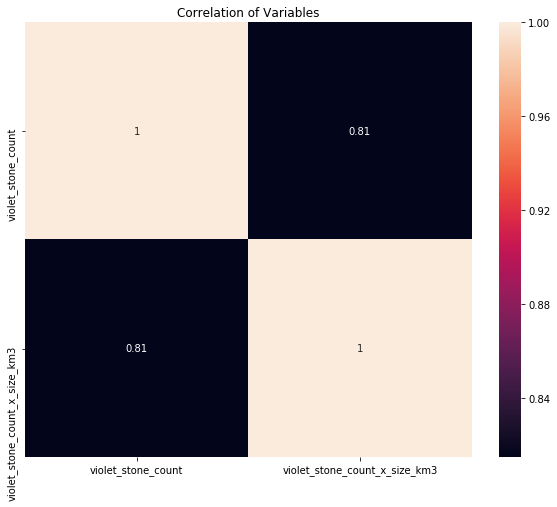

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 7.80111983347286
X2: 7.80111983347286

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied

- Possible multicollinearities were removed


In [48]:
linear_feature_names = ['X'+str(feature+1) for feature in range(X.shape[1])]
lr.multicollinearity_assumption(regr, X, y, linear_feature_names)
print()
print("- Possible multicollinearities were removed")

## Residual PDF (targets - predictions)

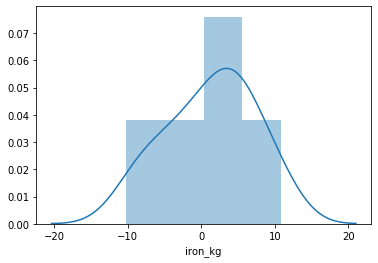

In [49]:
sns.distplot(y_test - y_pred)

As we can see from the graph some observations for which (targets-precition) is lower than the mean. These means that a higher amount of iron is predicted than is observe. On the other side of the graph we can see that the predictions doesn't underestimate the targets.

## Performance & sensitivity analysis

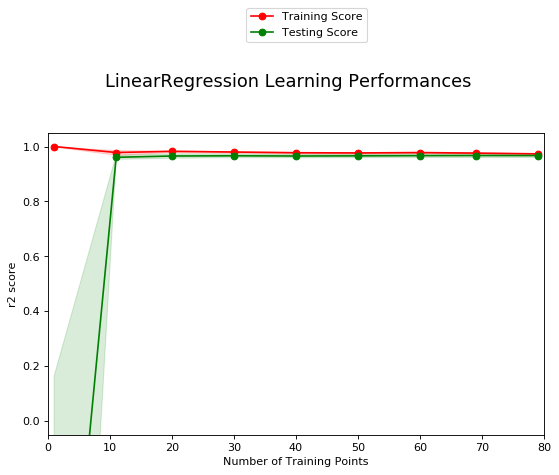

In [11]:
vc_helper.plot_learning_performance(regr, X, y)

- No trace of overfitting or underfitting is observed
- Few points are needed for the model to adjust to the behavior of the dataset

In [13]:
data_to_trial = (71, 32.122637)
vc_helper.predict_trials(X, y, regr, data_to_trial)

Trial 1: 52.43
Trial 2: 52.47
Trial 3: 52.36
Trial 4: 52.53
Trial 5: 52.99
Trial 6: 52.82
Trial 7: 52.53
Trial 8: 52.01
Trial 9: 52.67
Trial 10: 53.07

Range in values: 1.06


- the range observed between Trials is not significant, therefore the uniformity in the distribution of data that we can observe in the linear graph is re-validated.

In [ ]:
#difference between r2_score and explained_variance_score?
https://stackoverflow.com/questions/24378176/python-sci-kit-learn-metrics-difference-between-r2-score-and-explained-varian

In [ ]:
#adjusted r squared
https://datascience.stackexchange.com/questions/14693/what-is-the-difference-of-r-squared-and-adjusted-r-squared
https://www.investopedia.com/ask/answers/012615/whats-difference-between-rsquared-and-adjusted-rsquared.asp

In [ ]:
#Difference between preprocessing train and test set before and after splitting
https://stats.stackexchange.com/questions/267012/difference-between-preprocessing-train-and-test-set-before-and-after-splitting

In [ ]:
#interaction effects and interaction plots!
https://statisticsbyjim.com/regression/interaction-effects/